* Importing Libraries

In [1]:
import numpy as np                      # For numpy operatios
import pandas as pd                     # For data structure operations
import matplotlib.pyplot as plt         # For plottingoperations
import seaborn as sb                    # For visualization operations
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler  # For preprocessing of data
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score   # For model selection
from sklearn.linear_model import LogisticRegression            # For logistics regression model.
from sklearn.naive_bayes import GaussianNB                     # For naive-bayes model
from sklearn.tree import DecisionTreeClassifier,plot_tree      # For decision tree model
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier  # For bagging & boosting models
from sklearn.metrics import accuracy_score,f1_score,precision_score,mean_squared_error,recall_score,confusion_matrix # For model evaluation
import warnings
warnings.filterwarnings('ignore')      # Ignoring the filter warnings

* Data reading & preprocessing

In [2]:
#reading the data
house_c=pd.read_csv('Project2_Classification_HouseGrade_Data_Project-625edbc5-68f4-4fe4-97f2-29ba63a71a0e.csv')
house=house_c.copy()
house.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
# shape of data
house.shape

(3000, 14)

In [4]:
# to check the data types of each column
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [5]:
# checking the null values
house.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [6]:
# statistical measurements
house.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [7]:
# checking the value counts of each attributes of each categorical columns
cat=house.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    print(house[i].value_counts())
    print(10*'========')

YES    1543
NO     1457
Name: roof, dtype: int64
D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64


* EDA

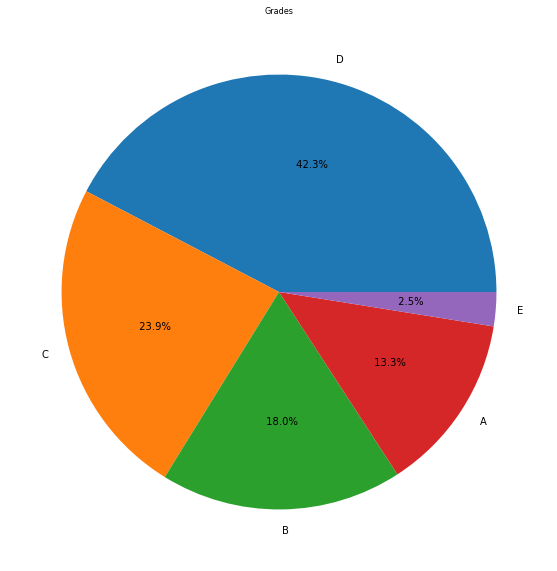

In [8]:
# Viewing the Grades 
a=house['Grade'].value_counts()
lbl=a.index
plt.figure(figsize=(10,10))
plt.pie(x=a,labels=lbl,autopct='% .1f%%')
plt.title('Grades',fontsize=8)
plt.show()

* No of Grade D houses are most among all followed by Grade C houses. There are only 13% best houses present now .

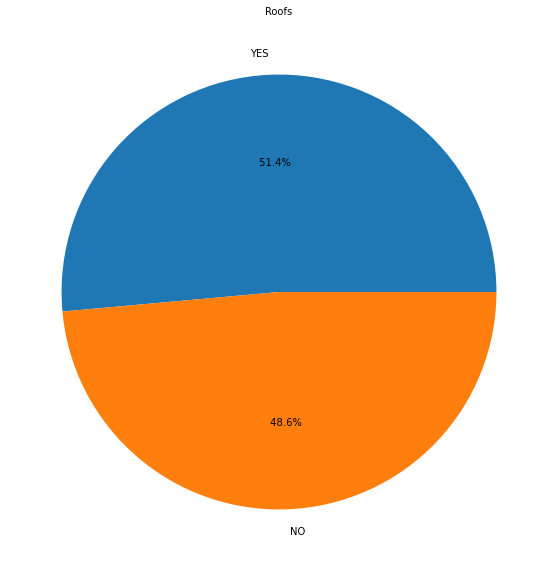

In [9]:
# viewing the roof counts of total houses
b=house['roof'].value_counts()
lbl=b.index
plt.figure(figsize=(10,10))
plt.pie(x=b,labels=lbl,autopct='% .1f%%')
plt.title('Roofs',fontsize=10)
plt.show()

* Most of the Houses have roofs into it. So it seems like people like both the with roof houses and without roof houses.

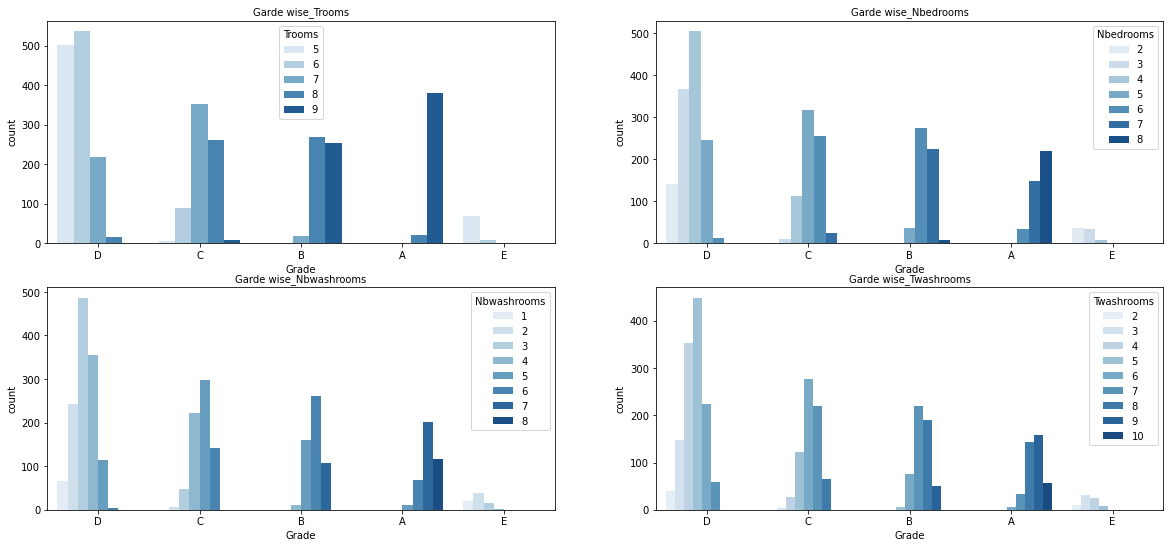

In [10]:
# Grade wise important features for the house selection
lst=['Trooms','Nbedrooms','Nbwashrooms','Twashrooms']
plt.figure(figsize=(20,9))
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    sb.countplot(data=house, hue=lst[i],x='Grade',palette='Blues')
    plt.title('Garde wise_'+lst[i],fontsize=10)
plt.show()

* Rooms- It seems like most of the varities of rooms are available in grade D. Grade A have more no of 9 roomed house.
* Bedrooms- It seems like most of the varities of bedrooms are present in Group D . Grade A have more no of 6,7,8 bedroomed house .
* Attached Washrooms with Bedrooms- It seems like most of the varities of attached washrooms with bedrooms are present in Group D. Grade A have more no of attached bathrooms with bedrooms compared to other Grade houses.
* Washrooms- It seems like most of the varities of washrooms are present in Group D followed by group A.

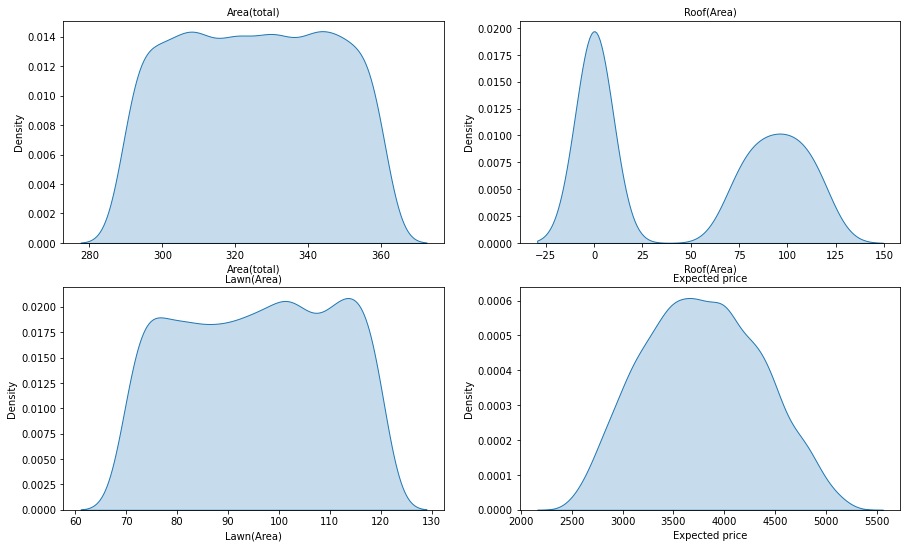

In [11]:
# Area and Price distribution of houses
lst1=['Area(total)','Roof(Area)','Lawn(Area)','Expected price']
plt.figure(figsize=(15,9))
for i in range(0,len(lst1)):
    plt.subplot(2,2,i+1)
    sb.kdeplot(data=house, x=lst1[i],shade=True, palette='summer')
    plt.title(lst1[i],fontsize=10)
plt.show()

* Total Area- Total area distributed within range of 280- 360 .
* Roof Area- Roof areas are not equally distributed as there are non roofed house also present.
* Lawn Area- Lawn areas are distributed within range 62- 127 .
* Expected Price- Price of houses ranges in between 2300- 5200 .

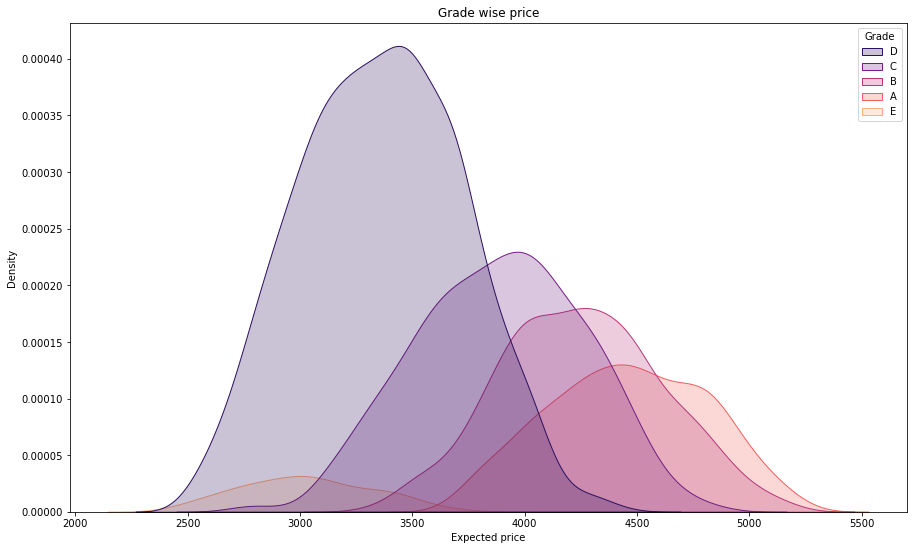

In [12]:
# Grade wise price distribution
plt.figure(figsize=(15,9))
plt.title('Grade wise price')
sb.kdeplot(data=house,hue='Grade',x='Expected price',shade=True,palette='magma');

* Grade A- Price ranges between 3500- 5500.
* Grade B- Price ranges between 3000- 5500.
* Grade C- Price ranges between 2500-5000.
* Grade D- Price ranges between 2400- 4500.
* Grade E- Price ranges between 2300-3700.

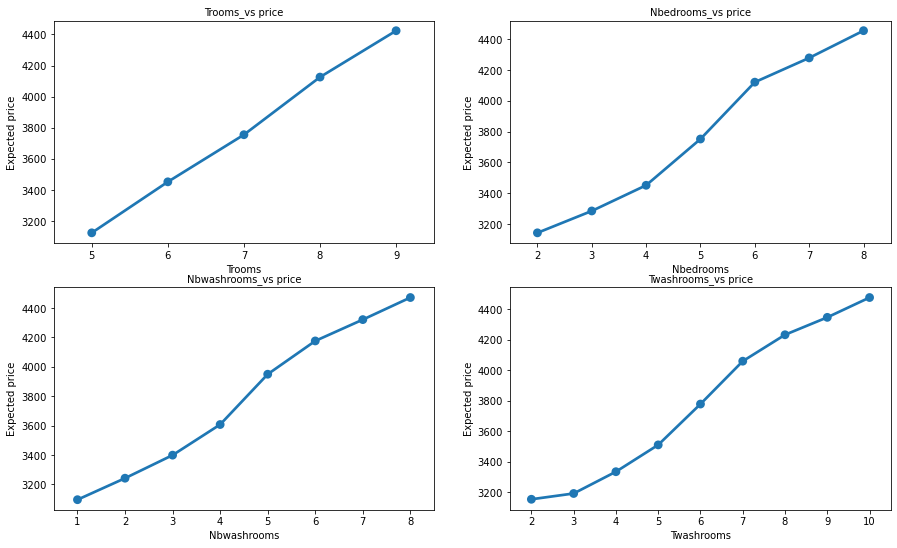

In [13]:
# Price wise important features for the house selection
lst=['Trooms','Nbedrooms','Nbwashrooms','Twashrooms']
plt.figure(figsize=(15,9))
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    sb.pointplot(data=house, x=lst[i],y='Expected price',ci=0)
    plt.title(lst[i]+'_vs price',fontsize=10)
plt.show()

* Rooms- With increasing no of rooms the price was also increasing.
* Bedrooms- With increasing no of Bedrooms the price was also increasing.
* Attached Washrooms with Bedrooms- with increasing no of Attached Washrooms with Bedrooms the price was also incresing.
* Washrooms- With increasing no of Washrooms the price was also increasing.

* Data Mining

In [14]:
#lable encoding the categorical columns
lable_encoder=LabelEncoder()
for i in list(cat.columns):
    house[i+'_Encoder']=lable_encoder.fit_transform(house[i])
house.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_Encoder,Grade_Encoder
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3


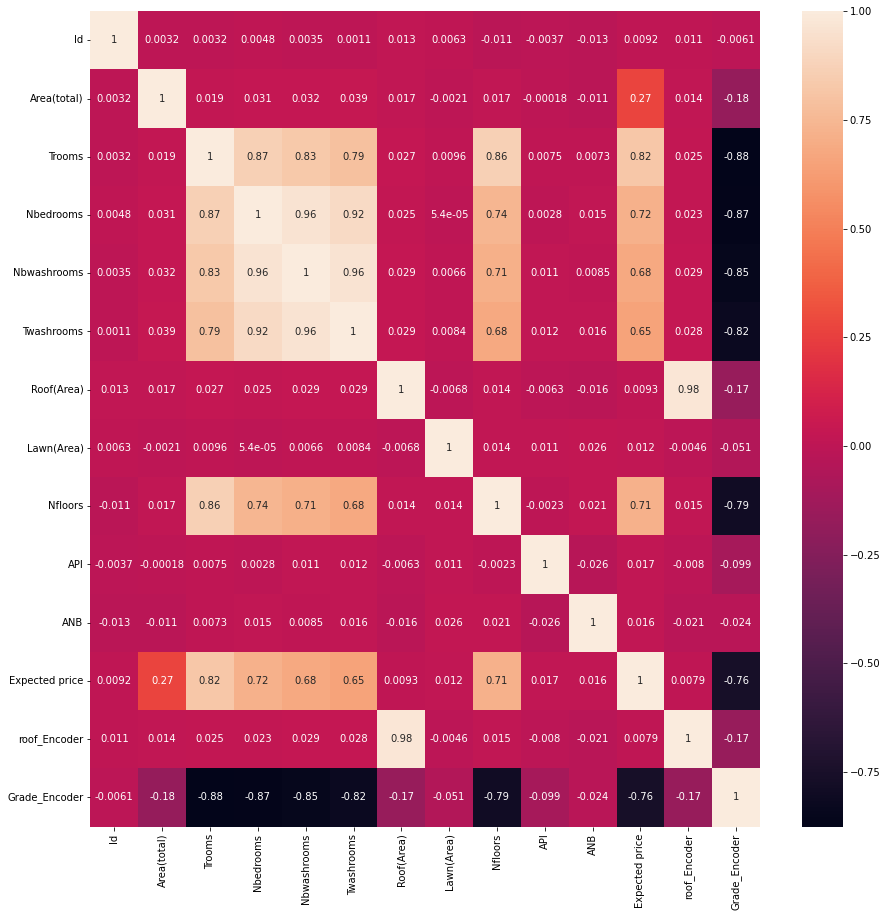

In [15]:
# corelation among all the columns
corr1=house.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr1,annot=True);

In [16]:
# selecting the numerical columns and dropping the unnecessary columns that have highly varied data compared to other for better scaling purpose.
house_num=house.select_dtypes(include=[np.number])
house_num.drop(['Roof(Area)','Lawn(Area)','ANB','Id'], axis=1,inplace=True)
house_num.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,API,Expected price,roof_Encoder,Grade_Encoder
0,339,6,5,4,6,2,79,3481,0,3
1,358,5,4,3,4,3,72,3510,1,3
2,324,7,5,4,5,5,64,3748,1,2
3,330,6,4,3,5,2,59,3134,1,3
4,320,7,4,4,5,3,40,3843,0,3


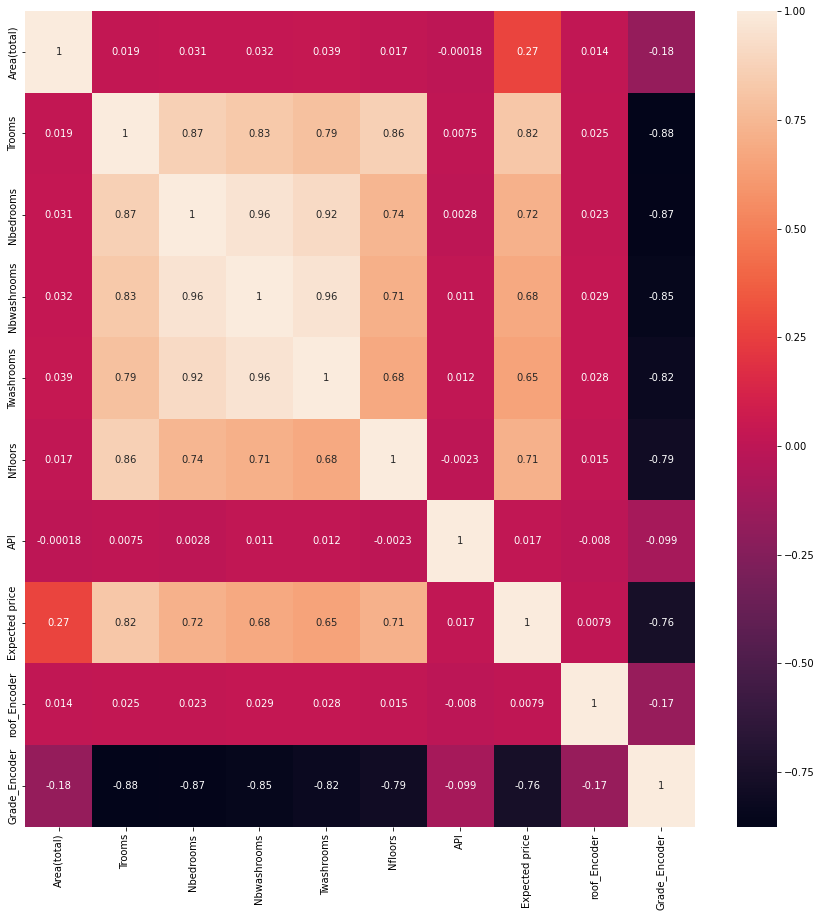

In [17]:
# corelation among all the columns after droping the unnecessary columns
corr=house_num.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True);

In [18]:
# selecting the highly corelated data for further processing
lst2=['Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Nfloors','Expected price']
scale=MinMaxScaler()
x= house_num[lst2]
y=house_num['Grade_Encoder']

In [19]:
# scaling the X data and concated the scaled data with target variable cause it's a classification problem so my target varibale should be as it is.
house_scl = pd.DataFrame(MinMaxScaler().fit_transform(x.to_numpy()),columns=x.columns)
house_scl=pd.concat([house_scl,y],axis=1)
house_scl.head()

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade_Encoder
0,0.25,0.500000,0.428571,0.500,0.166667,0.360251,3
1,0.00,0.333333,0.285714,0.250,0.333333,0.370944,3
2,0.50,0.500000,0.428571,0.375,0.666667,0.458702,2
3,0.25,0.333333,0.285714,0.375,0.166667,0.232301,3
4,0.50,0.333333,0.428571,0.375,0.333333,0.493732,3


In [20]:
# Selecting my target variable and non target variables
x=house_scl.drop('Grade_Encoder',axis=1)
y=house_scl['Grade_Encoder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

* Logistic Regresson

In [21]:
model_log= LogisticRegression()                                # Model building
model_log.fit(x_train,y_train)                                 # Fitting training datas into my model
y_pred_log=model_log.predict(x_test)                           # Predicted my non targeted variable datas
conf=confusion_matrix(y_test,y_pred_log)                       # Creating the confusion matrix to obtain model performace
acc_log=accuracy_score(y_test,y_pred_log)                      # calculating the accuracy score
f1_log=f1_score(y_test,y_pred_log,average='weighted')          # taken the average because my predicted Y values are continious
re_log=recall_score(y_test,y_pred_log,average='weighted')      # calculating recall score
pre_log=precision_score(y_test,y_pred_log,average='weighted')  # calculating precision score
print('confusion matrix \n',conf )
print('Accuracy : ',acc_log)
print('F1 Score : ',f1_log)
print('Recall Score: ',re_log)
print('Precision Score: ',pre_log)

confusion matrix 
 [[109  21   0   0   0]
 [ 15 133  38   0   0]
 [  0  17 137  42   0]
 [  0   0  26 339   0]
 [  0   0   0  23   0]]
Accuracy :  0.7977777777777778
F1 Score :  0.7858279332226192
Recall Score:  0.7977777777777778
Precision Score:  0.7764529472125514


* Naive-Bayes Classification

In [22]:
model_nb=GaussianNB()                                     # Model building
model_nb.fit(x_train,y_train)                             # Fitting training datas into my model
y_pred_nb=model_nb.predict(x_test)                        # Predicted my non targeted variable datas
conf=confusion_matrix(y_test,y_pred_nb)                   # Creating the confusion matrix to obtain model performace
acc_nb=accuracy_score(y_test,y_pred_nb)                   # calculating the accuracy score
f1_nb=f1_score(y_test,y_pred_nb,average='weighted')        # taken the average because my predicted Y values are continious
re_nb=recall_score(y_test,y_pred_nb,average='weighted')    # calculating recall score
pre_nb=precision_score(y_test,y_pred_nb,average='weighted') # calculating precision score
print('confusion matrix \n',conf )
print('Accuracy : ',acc_nb)
print('F1 Score : ',f1_nb)
print('Recall Score: ',re_nb)
print('Precision Score: ',pre_nb)

confusion matrix 
 [[107  23   0   0   0]
 [ 20 146  20   0   0]
 [  0  27 147  22   0]
 [  0   0  53 246  66]
 [  0   0   0   9  14]]
Accuracy :  0.7333333333333333
F1 Score :  0.7499092464783105
Recall Score:  0.7333333333333333
Precision Score:  0.7857987115285047


* Decision Tree Classifier

In [23]:
for i in range(2,10):                           
    acc=cross_val_score(DecisionTreeClassifier(max_depth=i ,random_state=1), x,y, cv=5, scoring='r2')
    print(' At depth ',i,':  Accuracy :', acc.mean())     # Checking at which maximum depth i can get the better accuracy
    print(10*'====')

 At depth  2 :  Accuracy : 0.7504415614701164
 At depth  3 :  Accuracy : 0.78496674130198
 At depth  4 :  Accuracy : 0.8019744970755163
 At depth  5 :  Accuracy : 0.8151891193796148
 At depth  6 :  Accuracy : 0.8186954754882718
 At depth  7 :  Accuracy : 0.816267679870115
 At depth  8 :  Accuracy : 0.808445003951282
 At depth  9 :  Accuracy : 0.7941469660856765


In [24]:
model_dtm=DecisionTreeClassifier(max_depth=6)                # Model building
model_dtm.fit(x_train,y_train)                               # Fitting training datas into my model
y_pred_dtm=model_dtm.predict(x_test)                         # Predicted my non targeted variable datas
conf=confusion_matrix(y_test,y_pred_dtm)                     # Creating the confusion matrix to obtain model performace
acc_dtm=accuracy_score(y_test,y_pred_dtm)                    # calculating the accuracy score
f1_dtm=f1_score(y_test,y_pred_dtm,average='weighted')        # taken the average because my predicted Y values are continious
re_dtm=recall_score(y_test,y_pred_dtm,average='weighted')    # calculating recall score
pre_dtm=precision_score(y_test,y_pred_dtm,average='weighted')  # calculating precision score
print('confusion matrix \n',conf )
print('Accuracy : ',acc_dtm)
print('F1 Score : ',f1_dtm)
print('Recall Score: ',re_dtm)
print('Precision Score: ',pre_dtm)

confusion matrix 
 [[105  25   0   0   0]
 [ 10 133  43   0   0]
 [  0  19 137  40   0]
 [  0   0  33 329   3]
 [  0   0   0  22   1]]
Accuracy :  0.7833333333333333
F1 Score :  0.7760228938338888
Recall Score:  0.7833333333333333
Precision Score:  0.7748853932068756


* Random Forest Classifier

In [25]:
for i in range(2,10):
    acc=cross_val_score(RandomForestClassifier(max_depth=i ,random_state=1), x,y, cv=5, scoring='r2')
    print(' At depth ',i,':  Accuracy :', acc.mean())    # Checking at which maximum depth i can get the better accuracy
    print(10*'====')

 At depth  2 :  Accuracy : 0.8222071408658269
 At depth  3 :  Accuracy : 0.8351556290463652
 At depth  4 :  Accuracy : 0.8351573405947089
 At depth  5 :  Accuracy : 0.8370456901628615
 At depth  6 :  Accuracy : 0.8383952921764759
 At depth  7 :  Accuracy : 0.836505615291099
 At depth  8 :  Accuracy : 0.8354282424773427
 At depth  9 :  Accuracy : 0.8332686241405988


In [ ]:
model_rf=RandomForestClassifier(max_depth=6)                # Model building
model_rf.fit(x_train,y_train)                               # Fitting training datas into my model
y_pred_rf=model_rf.predict(x_test)                          # Predicted my non targeted variable datas
conf=confusion_matrix(y_test,y_pred_rf)                     # Creating the confusion matrix to obtain model performace
acc_rf=accuracy_score(y_test,y_pred_rf)                     # calculating the accuracy score
f1_rf=f1_score(y_test,y_pred_rf,average='weighted')         # taken the average because my predicted Y values are continious
re_rf=recall_score(y_test,y_pred_rf,average='weighted')     # calculating recall score
pre_rf=precision_score(y_test,y_pred_rf,average='weighted') # calculating precision score
print('confusion matrix \n',conf )
print('Accuracy : ',acc_rf)
print('F1 Score : ',f1_rf)
print('Recall Score: ',re_rf)
print('Precision Score: ',pre_rf)

* Adaboost Classifier

In [ ]:
model_ada=AdaBoostClassifier()                              # Model building
model_ada.fit(x_train,y_train)                              # Fitting training datas into my model
y_pred_ada=model_ada.predict(x_test)                        # Predicted my non targeted variable datas
conf=confusion_matrix(y_test,y_pred_ada)                    # Creating the confusion matrix to obtain model performace
acc_ada=accuracy_score(y_test,y_pred_ada)                   # calculating the accuracy score
f1_ada=f1_score(y_test,y_pred_ada,average='weighted')        # taken the average because my predicted Y values are continious
re_ada=recall_score(y_test,y_pred_ada,average='weighted')    # calculating recall score
pre_ada=precision_score(y_test,y_pred_ada,average='weighted') # calculating precision score
print('confusion matrix \n',conf )
print('Accuracy : ',acc_ada)
print('F1 Score : ',f1_ada)
print('Recall Score: ',re_ada)
print('Precision Score: ',pre_ada)

* Final Summary of all used models

In [ ]:
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic','Naive-Bayes','Decision Tree','Random Forest','Adaboost'])
tbl['Accuracy']=pd.Series([acc_log,acc_nb,acc_dtm,acc_rf,acc_ada])
tbl['F1 score']=pd.Series([f1_log,f1_nb,f1_dtm,f1_rf,f1_ada])
tbl['Recall Score']=pd.Series([re_log,re_nb,re_dtm,re_rf,re_ada])
tbl['Precision Score']=pd.Series([pre_log,pre_nb,pre_dtm,pre_rf,pre_ada])
tbl.set_index('Model')

## According to Accuracy And F1 Score Logistic Regression is the best model to predict further datas regarding this dataset among all the models .

### Recomendations: 

#### 1. GRADE - A :
* There are only 13.3% of total houses lies in this grade. So houses are very limited here.
* The price ranges in between 3500 - 5500. So if you have that much of budget then you should look for a house of Grade A. If your budget doesn't permit that price range then you can avoid Grade A houses.
* There are only big houses with more no of attached bathrooms are present. So if you have a big family and better budget also then definately Grade A houses are for you. Otherwise you can avoid it.

#### 2. GRADE - B :
* There are only 18% of total houses lies in this grade. So houses are very limited here and it was quiet simillar to Grade A houses with wider range of price compared to Grade A houses.
* The price ranges in between 3000 - 5500. So if you have that much of budget then you should look for a house of Grade B. If your budget doesn't permit that price range then you can avoid Grade B houses.
* There are only big houses with more no of attached bathrooms are present. So if you have a big family and budget also then definately Grade B houses are for you. Otherwise you can avoid it.

#### 3.GRADE - C :
* There are only 23.9% of total houses lies in this grade. So choice of houses are more here compared to Grade A & B.
* The price ranges in between 2500 - 5000. So if you have that much of budget then you should look for a house of Grade C. If your budget doesn't permit that price range then you can avoid Grade C houses.
* There are big as well as medium houses with more no of attached bathrooms are present with wider price range. So if you have a big- medium family and budget also then definately Grade C houses are for you. Otherwise you can avoid it.

#### 4.GRADE - D :
* There are only 42.3% of total houses lies in this grade. So choice of houses are far more here compared to Grade A,B & C.
* The price ranges in between 2400 - 4500. So if you have that much of budget then you should look for a house of Grade D. If your budget doesn't permit that price range then you can avoid Grade D houses.
* There are small & medium houses with more no of attached bathrooms are present with wider price range. So if you have a medium-small family and budget also then definately Grade D houses are for you. Otherwise you can avoid it.

#### 5.GRADE - E :
* There are only 2.5% of total houses lies in this grade. So choice of houses are very much limited here.
* The price ranges in between 2300 - 3700. So if you have that much of budget then you should look for a house of Grade D.
* There are only small houses are present with wider price range. So if you have a small family or you are a batchalor the you should move to Grade E houses.